# Test - Cutoff 1 (4x4 and 5x5)

In [1]:
from sklearn.pipeline import Pipeline
from pymks.fmks.bases.primitive import PrimitiveTransformer
from pymks.fmks.correlations import TwoPointcorrelation,auto_correlation,correlations_multiple,center_slice,two_point_stats
import numpy as np
%load_ext autoreload
%autoreload 2

In [2]:
import dask.array as da

In [3]:
    >>> x_data1 = np.asarray([[[1, 1, 0 ,1],
    ...                       [0, 0, 1 ,0],
    ...                       [1, 1, 0 ,1],
    ...                       [1, 1, 0 ,1]]])
    >>> x_data2 = np.asarray([[[1, 1, 0 ,1 ,1],
    ...                       [0, 0, 1 ,0 ,0],
    ...                       [1, 1, 0 ,1 ,1],
    ...                       [1, 1, 0 ,1 ,0],
                              [1, 1, 1 ,1 ,0]]])
    >>> x_data3 = np.asarray([[[1, 1, 0 ,1 ,1],
    ...                       [0, 0, 1 ,0 ,0],
    ...                       [1, 1, 0 ,1 ,1],
    ...                       [1, 1, 0 ,1 ,0]]])
    >>> x_data4 = np.asarray([[[1, 1, 0 ,1 ],
    ...                       [0, 0, 1 ,0 ],
    ...                       [1, 1, 0 ,1 ],
    ...                       [1, 1, 0 ,1 ],
                              [1, 1, 1 ,1 ]]])
    >>> x_data5 = np.repeat(x_data4[:,:,:,np.newaxis],4,axis=3)
    

In [4]:
    >>> x_data6 = np.asarray([[[1, 1, 0 ,1],
    ...                       [0, 0, 1 ,0 ],
    ...                       [1, 1, 0 ,1 ],
    ...                       [1, 1, 0 ,1 ],
                              [1, 1, 1 ,1 ]]])
    print(x_data6.shape)

(1, 5, 4)


In [5]:
print(x_data1.shape)
print(x_data2.shape)
print(x_data3.shape)
print(x_data4.shape)
print(x_data5.shape)


(1, 4, 4)
(1, 5, 5)
(1, 4, 5)
(1, 5, 4)
(1, 5, 4, 4)


In [88]:

x_data=np.asanyarray([np.random.randint(2,size=(5,5))])

In [89]:
chunks = x_data.shape

In [90]:
x_data = da.from_array(x_data, chunks=chunks)

In [91]:
f_data = auto_correlation(x_data)
print(f_data.compute().shape)

(1, 5, 5)


In [92]:
center_slice(f_data,1)[0].compute()


array([[0.16, 0.2 , 0.12],
       [0.16, 0.36, 0.16],
       [0.12, 0.2 , 0.16]])

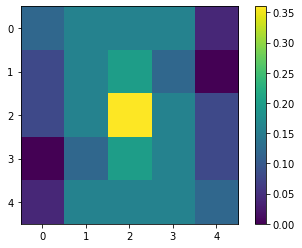

In [93]:
import matplotlib.pyplot as plt
plt.imshow(f_data[0])
plt.colorbar()

In [94]:
a=(1,10,10) 
print(a[1:])

(10, 10)


In [95]:
list(x_data.shape)


[1, 5, 5]

In [96]:
np.floor(1.5)

1.0

# Cases 

- odd square small cutoff
- odd square large cutoff
- different cutoff in different dimension
- even square small cutoff
- even square large cutoff
- Same for 3D

In [97]:
print(x_data.compute())

[[[0 0 0 1 1]
  [1 0 0 1 1]
  [0 0 0 0 0]
  [0 0 1 0 1]
  [0 0 0 1 1]]]


In [98]:
%autoreload
# print(x_data.shape)
stats=two_point_stats(x_data,x_data,periodic_boundary=False)

print(stats.compute())
plt.imshow(stats[0].compute())
plt.colorbar()


2.0


ValueError: Dask array only supports taking an FFT along an axis that 
has a single chunk. An FFT operation was tried on axis 1 
which has chunks (2, 5, 2). To change the array's chunks use dask.Array.rechunk.

In [78]:
aaa=np.arange(100).reshape((1,10 ,10))

Large center slice issue / add error warning. 2 solution to this
- Define upperbbound and get the value if cuffof > value
- Give an error " should be larger than this val"
- Add periodic Padding

In [79]:
center_slice(aaa,5)

array([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
        [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
        [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
        [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]])

(1, 5, 5)
(1, 5, 5, 2)


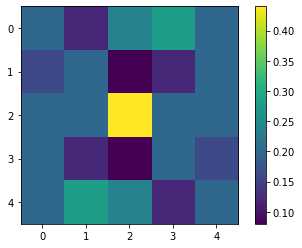

In [86]:
print(x_data.shape)
conj=1-x_data
arrays=[x_data,conj]
data=np.stack(arrays,axis=3)
print(data.shape)
stats=correlations_multiple(data,correlations=[[0,0]], cutoff=3)

# print(stats.shape)
# print(stats[0,:,:,:,0].compute())
plt.imshow(stats[0,:,:,0])
plt.colorbar()

In [87]:
Sez=x_data1
chunks2 = x_data1.shape
x_data1 = da.from_array(x_data1, chunks=chunks2)

ValueError: Array is already a dask array. Use 'asarray' or 'rechunk' instead.

In [85]:
import matplotlib.pyplot as plt
stats=two_point_stats(x_data1,x_data1,periodic_boundary=True,cutoff=2)




In [22]:
print(stats.compute())
Sez

[[[0.375 0.375 0.375]
  [0.375 0.625 0.375]
  [0.375 0.375 0.375]]]


array([[[1, 1, 0, 1],
        [0, 0, 1, 0],
        [1, 1, 0, 1],
        [1, 1, 0, 1]]])

In [23]:
center_slice(f_data,1)[0].compute()

array([[0.05, 0.05, 0.05],
       [0.05, 0.3 , 0.05],
       [0.05, 0.05, 0.05]])

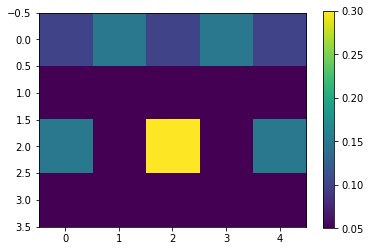

In [24]:
plt.imshow(f_data[0])
plt.colorbar()

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

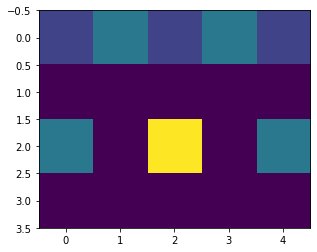

In [25]:
plt.imshow(center_slice(f_data,2)[0])
plt.colorbar

In [26]:
    >>> a = np.arange(16).reshape(1, 4, 4)
    >>> print(center_slice(a, 2).shape)

(1, 4, 4)


# Tasks
* Odd check
* Even Check
* 1D Check
* 2D Check
* 3D Check 